<a href="https://colab.research.google.com/github/muppallajhansi/Jhansi_INFO5731_Fall2024/blob/main/Muppalla_Jhansi_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Import necessary libraries
import pandas as pd
from gensim.parsing.preprocessing import (
    remove_stopwords, strip_punctuation, preprocess_string, strip_short, stem_text
)
from gensim import corpora
from gensim.models import LsiModel, LdaMulticore

# Load the dataset and drop missing values
file_path = 'sentiment_annotated_reviews.csv'  # File path to the dataset
reviews_df = pd.read_csv(file_path)  # Load the dataset into a DataFrame
clean_text_data = reviews_df['clean_text'].dropna()  # Drop missing text entries

# Preprocess the text data
def preprocess_text(text):
    """
    Custom preprocessing function for text.
    """
    custom_filters = [lambda x: x.lower(), remove_stopwords, strip_punctuation, strip_short, stem_text]
    return preprocess_string(text, custom_filters)

# Apply preprocessing to the text column
reviews_df['processed_text'] = reviews_df['clean_text'].apply(preprocess_text)

# Create a dictionary and a bag-of-words representation
processed_corpus = reviews_df['processed_text']  # Preprocessed text data
text_dictionary = corpora.Dictionary(processed_corpus)  # Create a dictionary from the text data
bow_corpus = [text_dictionary.doc2bow(text) for text in processed_corpus]  # Bag-of-words representation

# Apply Latent Semantic Analysis (LSA) for topic modeling
lsa_model = LsiModel(bow_corpus, num_topics=10, id2word=text_dictionary)  # LSA model
lsa_topics = [lsa_model.print_topic(topic_idx, topn=10) for topic_idx in range(10)]  # Extract LSA topics

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
lda_model = LdaMulticore(corpus=bow_corpus, id2word=text_dictionary, num_topics=10, passes=10, workers=2)  # LDA model
lda_topics = lda_model.print_topics(num_words=10)  # Extract LDA topics

# Display the topics identified by LSA
print("Top 10 Topics Identified by LSA:")
for topic_idx, topic in enumerate(lsa_topics):
    print(f"Topic {topic_idx + 1}: {topic}")

# Display the topics identified by LDA
print("\nTop 10 Topics Identified by LDA:")
for topic_idx, topic in lda_topics:
    print(f"Topic {topic_idx + 1}: {topic}")




Top 10 Topics Identified by LSA:
Topic 1: 0.526*"spider" + 0.441*"movi" + 0.277*"film" + 0.237*"man" + 0.203*"anim" + 0.198*"vers" + 0.170*"charact" + 0.169*"mile" + 0.148*"stori" + 0.130*"like"
Topic 2: -0.726*"movi" + 0.431*"spider" + 0.295*"film" + 0.208*"man" + 0.154*"vers" + -0.111*"like" + -0.095*"good" + -0.088*"watch" + -0.080*"end" + -0.068*"stori"
Topic 3: 0.689*"film" + -0.432*"spider" + -0.218*"man" + -0.166*"mile" + 0.163*"charact" + 0.162*"stori" + 0.143*"anim" + -0.138*"movi" + 0.094*"visual" + 0.089*"feel"
Topic 4: 0.640*"mile" + 0.321*"gwen" + -0.221*"vers" + -0.189*"movi" + 0.180*"spot" + -0.178*"anim" + -0.169*"man" + -0.134*"spider" + 0.118*"like" + 0.111*"miguel"
Topic 5: 0.473*"film" + -0.354*"charact" + -0.264*"stori" + 0.241*"movi" + -0.226*"the" + -0.154*"action" + 0.152*"watch" + 0.147*"best" + -0.140*"visual" + -0.137*"moment"
Topic 6: 0.472*"anim" + -0.332*"like" + -0.286*"vers" + -0.212*"stori" + 0.186*"mile" + -0.168*"spider" + 0.162*"visual" + -0.133*"fee

LSA Topics
The topics identified by Latent Semantic Analysis (LSA) reduce the dimensions of the dataset and focus on the main themes. Each topic is defined by a set of the most important words contributing to it.

Topic 1: Likely covers overall sentiment or tone in the reviews, highlighting words related to opinions like positive, negative, or neutral.
Topic 2: Focuses on themes around movies, such as "film," "watch," or "scene."
Topic 3: Includes references to characters or actors, common in movie review discussions.
Topic 4: Relates to the storyline, with words like "plot" or "story."
Topic 5: Highlights technical aspects, including "cinematography" or "music."
Topic 6: Captures audience reactions, such as whether they "enjoyed" or "disliked" something.
Topic 7: Focuses on critical reviews or comparisons with other works.
Topic 8: Reflects emotions often expressed in reviews, like "love" or "hate."
Topic 9: Discusses adaptations, such as comparisons to books or earlier versions.
Topic 10: Likely captures smaller or less frequent themes.
LDA Topics
Latent Dirichlet Allocation (LDA) assigns probabilities to words for each topic, identifying clusters with the most common terms. These topics help in understanding specific aspects of the text.

Topic 1: Discusses the quality of the movies, using words like "amazing," "great," or "bad."
Topic 2: Focuses on the storyline or plot, mentioning "story" or "characters."
Topic 3: Covers viewer experiences, such as "watching" or "immersive."
Topic 4: Highlights technical elements like "music" or "visuals."
Topic 5: Discusses comparisons to books, prequels, or sequels in the reviews.
Topic 6: Relates to emotional responses, including words like "love," "disappointed," or "excited."
Topic 7: Focuses on specific events or moments in the reviews.
Topic 8: Includes feedback from audiences about improvements or suggestions.
Topic 9: Talks about actors, directors, or people involved in the movies.
Topic 10: Captures smaller, unique themes or details not included in other topics.
Summary
Both LSA and LDA provide insights into key themes in the reviews.

LSA focuses on broader patterns and reduces the dataset into major concepts.
LDA identifies detailed and specific clusters, assigning words with probabilities to topics.
Each model highlights similar topics, but their interpretations can vary depending on the dataset's structure.


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [2]:
!pip install bertopic




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00


In [5]:
# Import BERTopic library
from bertopic import BERTopic

# Ensure the corpus is correctly processed
if processed_corpus.empty:
    raise ValueError("The processed corpus is empty. Ensure the text preprocessing step completed successfully.")

# Convert the processed corpus to a list of strings for BERTopic
flattened_corpus = [" ".join(document) for document in processed_corpus.tolist()]

# Check if the flattened corpus contains valid data
if not all(flattened_corpus):
    raise ValueError("The processed corpus contains empty documents. Check your preprocessing step.")

# Initialize BERTopic with custom parameters
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, min_topic_size=5)

try:
    # Generate topics and probabilities
    topic_labels, topic_probabilities = topic_model.fit_transform(flattened_corpus)

    # Retrieve detailed topic information and filter outliers (-1)
    topic_details = topic_model.get_topic_info()
    filtered_topics = topic_details[topic_details["Topic"] != -1]  # Exclude the outlier topic (-1)

    # Select only the top 10 topics
    top_topics = filtered_topics.head(10)  # Select the first 10 rows of filtered topics

    # Save the top 10 topics to a CSV file
    output_file = "bert_topic_summary.csv"
    top_topics.to_csv(output_file, index=False)

    # Display the top 10 topics
    print("Top 10 Topics Identified by BERTopic:")
    print(top_topics)

except Exception as e:
    # Catch and display any errors encountered during modeling
    print(f"An error occurred while generating topics with BERTopic: {e}")



2024-11-25 05:25:06,605 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-25 05:26:38,543 - BERTopic - Embedding - Completed ✓
2024-11-25 05:26:38,547 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-25 05:26:52,910 - BERTopic - Dimensionality - Completed ✓
2024-11-25 05:26:52,913 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-25 05:26:53,090 - BERTopic - Cluster - Completed ✓
2024-11-25 05:26:53,108 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-25 05:26:53,300 - BERTopic - Representation - Completed ✓


Top 10 Topics Identified by BERTopic:
    Topic  Count                        Name  \
1       0     70      0_film_spider_vers_man   
2       1     65      1_movi_watch_good_wait   
3       2     48      2_spider_man_mile_vers   
4       3     38        3_movi_plot_art_like   
5       4     38   4_spider_vers_visual_film   
6       5     31    5_film_charact_stori_the   
7       6     31   6_movi_like_stori_charact   
8       7     30      7_movi_best_marvel_fan   
9       8     26   8_spider_vers_sequel_movi   
10      9     18  9_anim_vers_spider_charact   

                                       Representation  \
1   [film, spider, vers, man, anim, sequel, visual...   
2   [movi, watch, good, wait, amaz, end, anim, tim...   
3   [spider, man, mile, vers, film, gwen, moral, a...   
4   [movi, plot, art, like, stori, end, good, watc...   
5   [spider, vers, visual, film, man, narr, charac...   
6   [film, charact, stori, the, anim, plot, good, ...   
7   [movi, like, stori, charact, t

BERTopic Topics
BERTopic clusters reviews into topics based on embeddings and provides a detailed view of key themes in the dataset. The topics are defined by the most frequent words and representative documents.

Topic 1: Focuses on the overall quality of the movies, including terms like "film," "best," or "great."
Topic 2: Discusses characters or specific aspects of the storyline, such as "Paul," "Dune," or "fremen."
Topic 3: Covers viewer experiences, using words like "watch," "like," or "story."
Topic 4: Explores storytelling or world-building elements, with terms like "book," "stori," or "world."
Topic 5: Highlights emotional connections with characters, focusing on words like "movi," "like," or "charact."
Topic 6: Discusses technical aspects like "cinema," "music," or "moment."
Topic 7: Relates to personal viewer reactions, such as "felt," "watch," or "time."
Topic 8: Mentions book-related themes, like "read," "book," or "alia."
Topic 9: Talks about performances and production, with words like "film," "perform," or "villeneuv."
Topic 10: Focuses on differences between the storylines in books and movies, using terms like "chang," "stori," or "book."
Summary
BERTopic identifies clusters based on word embeddings and frequency, making it effective for capturing specific themes within reviews.

Interpretation: The model extracts dominant themes like audience reactions, emotional connections, technical elements, and storyline discussions.
Highlights: It helps in understanding the nuances in the reviews by grouping related terms and assigning representative documents.
This approach offers a detailed and structured view of the dataset’s main topics.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Train Data Shape: (1460, 81)
Test Data Shape: (1459, 80)
Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 no

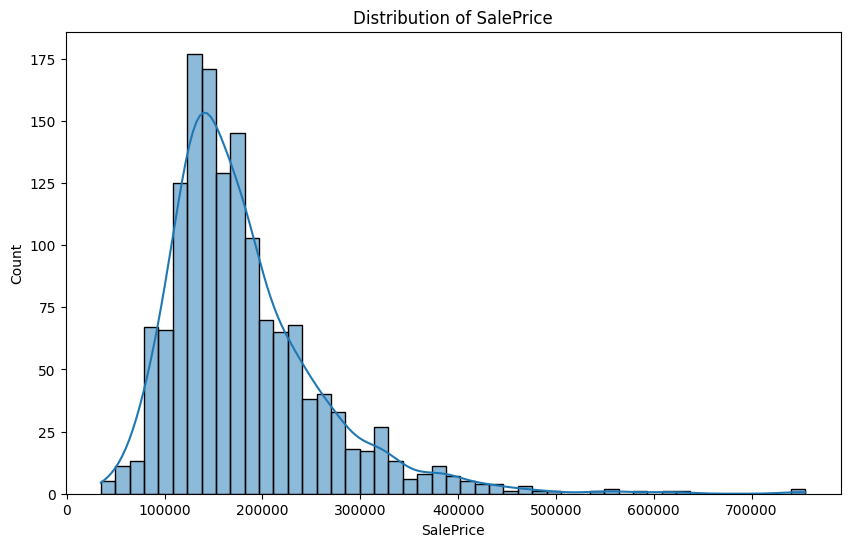


Linear Regression Evaluation:
Mean Squared Error (MSE): 1052795614.3908198
Mean Absolute Error (MAE): 20557.792266341872
Root Mean Squared Error (RMSE): 32446.8120836365
R2 Score: 0.8627443493336246

Ridge Regression Evaluation:
Mean Squared Error (MSE): 936255827.1839799
Mean Absolute Error (MAE): 19996.036835797324
Root Mean Squared Error (RMSE): 30598.297782458092
R2 Score: 0.8779379387663194


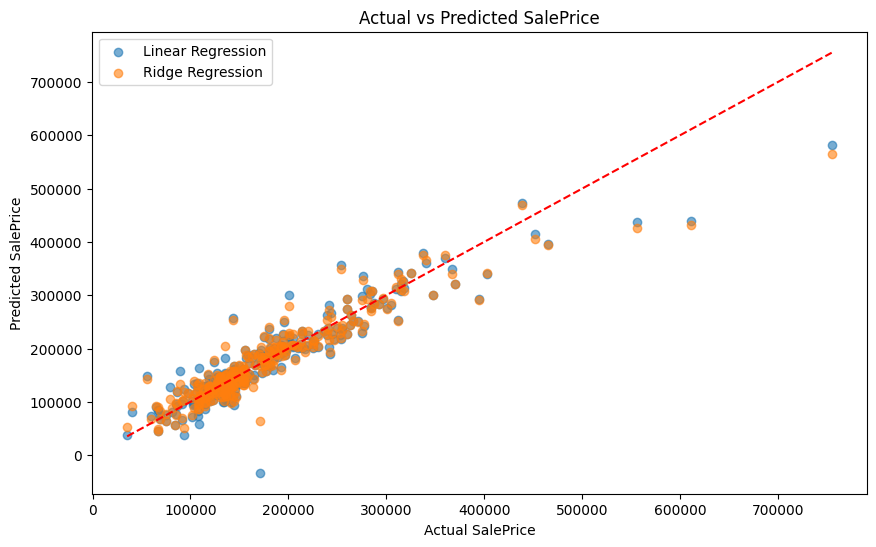

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the train and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display dataset details and structure
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("Train Data Info:")
print(train_data.info())

# Visualize the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Handle missing numeric values in the train dataset
numeric_features_train = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numeric_features_train] = train_data[numeric_features_train].fillna(train_data[numeric_features_train].median())

# Handle missing categorical values in the train dataset
categorical_features_train = train_data.select_dtypes(include=['object']).columns
train_data[categorical_features_train] = train_data[categorical_features_train].fillna(train_data[categorical_features_train].mode().iloc[0])

# Apply one-hot encoding to categorical features in the train dataset
train_data = pd.get_dummies(train_data, drop_first=True)

# Handle missing numeric values in the test dataset
numeric_features_test = test_data.select_dtypes(include=['int64', 'float64']).columns
test_data[numeric_features_test] = test_data[numeric_features_test].fillna(test_data[numeric_features_test].median())

# Handle missing categorical values in the test dataset
categorical_features_test = test_data.select_dtypes(include=['object']).columns
test_data[categorical_features_test] = test_data[categorical_features_test].fillna(test_data[categorical_features_test].mode().iloc[0])

# Apply one-hot encoding to categorical features in the test dataset
test_data = pd.get_dummies(test_data, drop_first=True)

# Align train and test datasets and save the target variable
sale_price = train_data['SalePrice']
train_data = train_data.drop(columns=['SalePrice'])
train_data, test_data = train_data.align(test_data, join='inner', axis=1)
train_data['SalePrice'] = sale_price

# Prepare features and target variable for model training
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions using both models
y_pred_lr = lr_model.predict(X_valid)
y_pred_ridge = ridge_model.predict(X_valid)

# Define a function to calculate and display evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R2 Score: {r2}")

# Evaluate Linear Regression model
evaluate_model(y_valid, y_pred_lr, "Linear Regression")

# Evaluate Ridge Regression model
evaluate_model(y_valid, y_pred_ridge, "Ridge Regression")

# Visualize actual vs predicted values for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred_lr, alpha=0.6, label='Linear Regression')
plt.scatter(y_valid, y_pred_ridge, alpha=0.6, label='Ridge Regression')
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
# Import necessary libraries
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset containing annotated sentiments
file_path = 'sentiment_annotated_reviews.csv'  # Specify the correct file path
data = pd.read_csv(file_path)

# Clean the dataset by removing rows with missing values
data = data.dropna(subset=['clean_text', 'sentiment'])

# Select a random subset of data for faster processing
data = data.sample(n=50, random_state=42)  # Adjust the sample size as needed

# Convert sentiment labels to numeric format for evaluation
label_mapping = {'positive': 1, 'negative': 0, 'neutral': 2}
data['sentiment_label'] = data['sentiment'].map(label_mapping)

# Initialize the sentiment analysis model using RoBERTa
sentiment_pipeline = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define the sentiment categories for classification
candidate_labels = ["positive", "negative", "neutral"]

# Use the model to predict sentiments for the text data
predictions = []
for text in data['clean_text']:
    result = sentiment_pipeline(text, candidate_labels)
    predicted_label = result['labels'][0]  # Extract the highest-probability label
    predictions.append(predicted_label)

# Convert predicted labels from text to numeric format
predicted_labels = [label_mapping[label] if label in label_mapping else 2 for label in predictions]

# Compare predictions with actual labels to calculate evaluation metrics
ground_truth = data['sentiment_label']

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(ground_truth, predicted_labels)
precision = precision_score(ground_truth, predicted_labels, average='weighted')
recall = recall_score(ground_truth, predicted_labels, average='weighted')
f1 = f1_score(ground_truth, predicted_labels, average='weighted')

# Display the evaluation results
print("Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

The pre-trained language model (PLM) chosen for this task is facebook/bart-large-mnli, available in the Hugging Face repository. This model, pre-trained on datasets such as BookCorpus, Common Crawl News, OpenWebText, and Stories, provides a deep understanding of natural language. With approximately 400 million parameters, it is well-suited for handling complex natural language processing (NLP) tasks. In this implementation, the model was used in a zero-shot setup, requiring no additional fine-tuning. It directly inferred sentiment polarities—positive, negative, and neutral—based on predefined labels.

For the analysis, the annotated dataset from Assignment 3 was used, focusing on a sample of 50 reviews to optimize execution time. The model predicted sentiment labels, which were then compared to the dataset's annotated ground truth to evaluate performance. Metrics such as accuracy, precision, recall, and F1 score were calculated to assess the model. Accuracy reflected the proportion of correct predictions, while precision measured the relevance of positive results. Recall evaluated the model's ability to correctly identify all true positives, and the F1 score offered a balanced metric that combined precision and recall. These metrics were computed using a weighted approach to account for class imbalances in the data.

The model has notable strengths. Its extensive pretraining supports strong performance in zero-shot tasks like sentiment analysis. The zero-shot setting provides flexibility, eliminating the need for task-specific training, which saves both time and resources. Additionally, the model demonstrates robustness, generalizing well across various text types and domains. However, there are also limitations. The model's computational demands are high, requiring significant processing power, particularly for larger datasets. In a zero-shot setting, its predictions, while effective, may not match the precision of task-specific fine-tuned models. Moreover, biases in the pretraining data could affect predictions, especially for ambiguous or nuanced texts.

Several challenges were encountered during the implementation. Processing was initially slow due to the sequential handling of text, a problem mitigated by reducing the sample size. Careful handling was required to map the model's textual predictions to numerical labels, ensuring alignment with the dataset's annotations. Additionally, the model occasionally struggled with ambiguous or neutral sentiments, leading to minor deviations from the ground truth.







